In [ ]:
import pandas as pd
import os
import sys
import urllib.request
import json

In [ ]:
mykey = "input your project key here"
url = "https://open.jejudatahub.net/api/proxy/1b1ta1a1ba6t6a1ttt3bD6b1tb1t1D3t/" + key + \
    "?startDate=20201001&endDate=20201002&number=" + pagenum
## 수집기간 2015-01-01 ~ 2020-12-15

#### 제주 데이터허브 API 이용하기 
- number = 페이지번호 / default=1
- 먼저 1페이지를 가져와서 결과 리스트에 붙여넣은 다음,
- 다음 페이지가 있으면(hasMore=="True") 페이지를 넘겨서 넘어간 페이지의 데이터를 가져와서 결과 리스트에 붙이고
- 다음 페이지가 없으면, 즉 마지막 페이지에 도달하면 break로 빠져나온다 
- 최종적으로는 결과 리스트를 반환한다
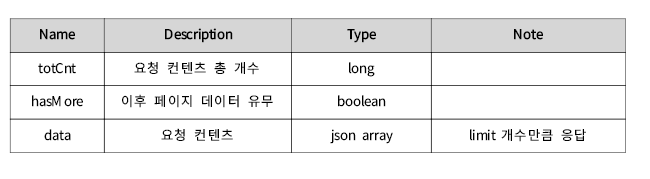

In [ ]:

def jejubus(startDate, endDate):
    total = [] #값을 붙여넣을 빈 리스트
    pagenum = 1 # 첫번째 페이지 번호 
    key = mykey # my project Key
    url = ("https://open.jejudatahub.net/api/proxy/1b1ta1a1ba6t6a1ttt3bD6b1tb1t1D3t/" + key + 
    "?startDate=" + str(startDate) + "&endDate=" + str(endDate) + "&number=" + str(pagenum)) # API url 구성
    
    request = urllib.request.Request(url)
    response = urllib.request.urlopen(request)
    result = json.loads(response.read().decode('utf-8')) #url 가져오기
    
    total.append(result) #크롤링된 결과를 total에 붙인다 
    
    while True: 
        if result["hasMore"] == True:
            pagenum += 1 #페이지 넘기기 
            url = ("https://open.jejudatahub.net/api/proxy/1b1ta1a1ba6t6a1ttt3bD6b1tb1t1D3t/" + key + 
            "?startDate=" + str(startDate) + "&endDate=" + str(endDate) + "&number=" + str(pagenum))# API url 구성
    
            request = urllib.request.Request(url)
            response = urllib.request.urlopen(request)
            result= json.loads(response.read().decode('utf-8')) #다음 페이지 데이터 가져오기
            total.append(result)
   
        else : 
            break
    return total

In [ ]:
#크롤링 실행 
#시작날짜, 종료날짜를 넣는다 
result = jejubus(20180101, 20201215)

In [ ]:
# 크롤링 결과에서 값을 가져올 준비
# 일단 개별 값을 가져오기 위해 리스트를 생성해주고 (이 리스트를 pandas dataframe의 column으로 넣을 예정)
# for 문을 사용하기 위해 개별 값의 key(dict type이므로)리스트와 리스트들의 리스트를 만들어준다
date = []
stn_id = []                                          
stn_name = []
movetype = []                                                                                                                                         
pricetype = []
paytype = []
usercount = []
## 박두진 강사님 코멘트 : 변수 선언 해줄 필요 없음 
var_list = [date, stn_id, stn_name, movetype, pricetype, paytype, usercount]
dict_list = ['baseDate', 'stationId', 'stationName', 'moveType', 'priceType', 'payType', 'userCount']


In [ ]:
# 크롤링 결과에서 개별 값을 가져와서 리스트로 만들기 

for i in range(len(result)):
    for index, key in enumerate(dict_list):
        var_list[index].extend([each[dict_list[index]] for each in result[i]["data"]])
    


In [ ]:
#데이터프레임 생성 

df_result = pd.DataFrame({"baseDate" : date,
                         "stationId" : stn_id,
                         "stationName" : stn_name, 
                         "moveType" : movetype, 
                         "priceType" : pricetype, 
                         "payType" : paytype,
                         "userCount" : usercount}) 

In [ ]:
df_result